# 12 Lead ST-wave Analysis

In [1]:
import warnings
warnings.simplefilter("ignore")

import os
import pandas as pd
import wfdb
import ast
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc

# ============== Scipy
from scipy import signal
from scipy.signal import butter, lfilter, freqz, filtfilt


# ============== Jupyter notebook
# from IPython.core.interactiveshell import InteractiveShell
# # InteractiveShell.ast_node_interactivity = "all"
# np.set_printoptions(threshold=np.inf)

In [2]:
ptb_xl_path = "/data/ECG_DATASET/ptbxl/"
os.listdir(ptb_xl_path)

['scp_statements.csv',
 'records500',
 'ptbxl_v102_changelog.txt',
 'records100',
 'SHA256SUMS.txt',
 'example_physionet.py',
 'RECORDS',
 'ptbxl_database.csv',
 'LICENSE.txt',
 'ptbxl_v103_changelog.txt']

### Example_Physionet.py

In [3]:
ptb_db = pd.read_csv(ptb_xl_path+"/ptbxl_database.csv")

In [4]:
def load_raw_data(df, sampling_rate, path):
    data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))


In [5]:
sampling_rate = 500
ptb_xl_path = "/data/ECG_DATASET/ptbxl/"

In [6]:
Y = pd.read_csv(ptb_xl_path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [7]:
X = load_raw_data(Y, sampling_rate, ptb_xl_path)

In [8]:
X.shape

(21799, 5000, 12)

In [9]:
X.shape

# 21799 clinical 12-lead ECG records of 10 seconds length from 18869 patients => 21799
# 10 sec / 500Hz => 5000
# Lead : 12

(21799, 5000, 12)

In [10]:
# # Plotting Example Data about 12-Lead with One Person

# %matplotlib INLINE

# fig = plt.figure(figsize=(40,10))
# for i,data in enumerate(test_D):
#     ax = fig.add_subplot(2,6,i+1)
#     ax.plot(data)
# plt.show()

In [11]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [12]:
agg_df = pd.read_csv(ptb_xl_path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [13]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19601, 5000, 12) (19601,)
(2198, 5000, 12) (2198,)


In [15]:
print(y_train)

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 19601, dtype: object


Header에 따르면 순서는 다음과 같다.
* I, II, III, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6
총 12개

In [16]:
X_train[0].shape

(5000, 12)

In [17]:
test_data = X_train[0]

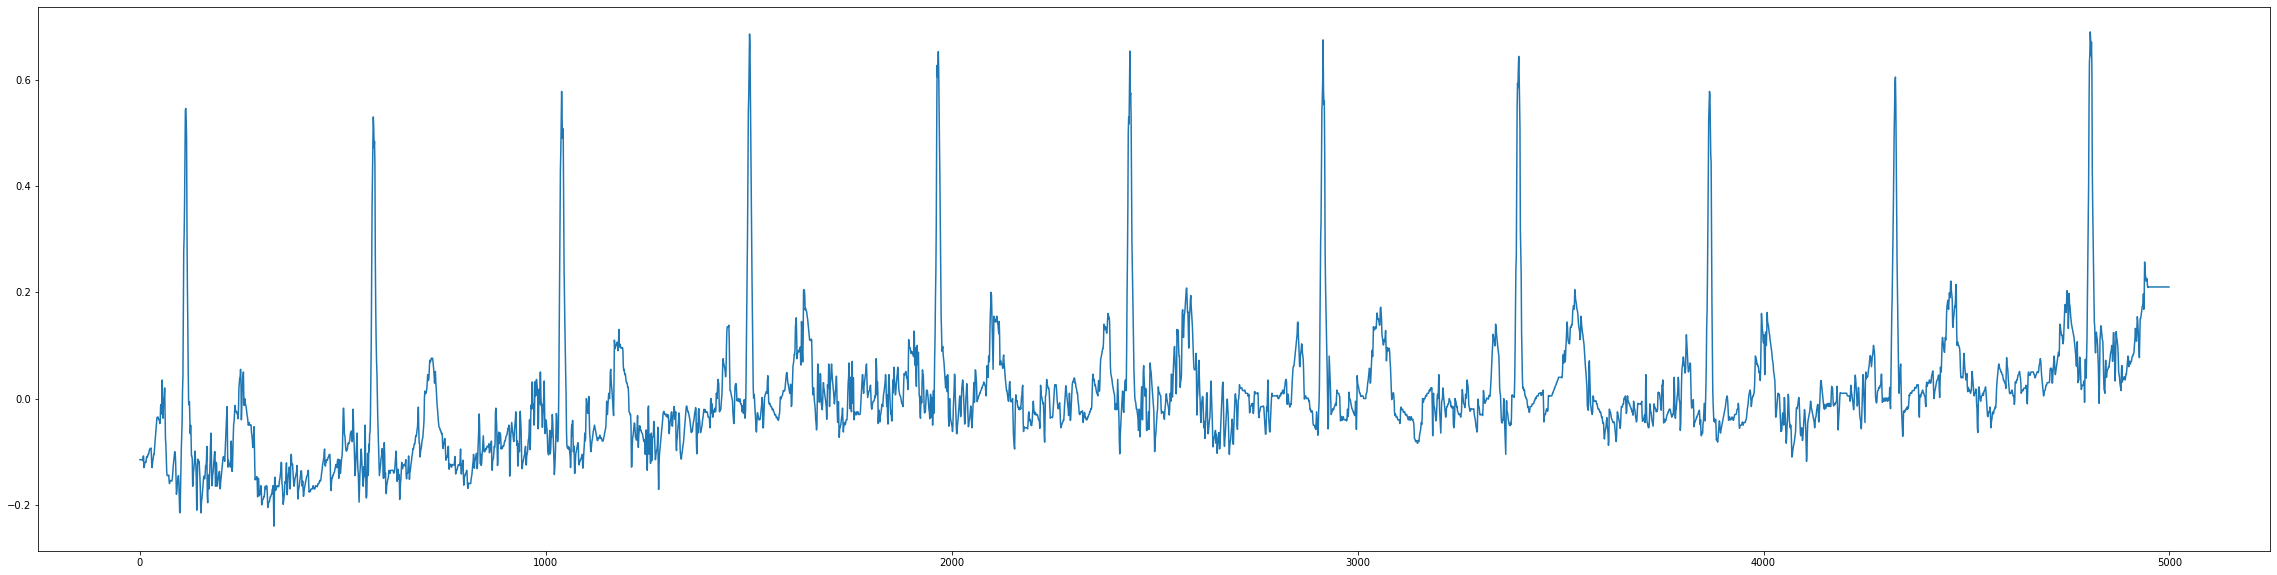

In [18]:
# Plotting Example Data about 12-Lead with One Person
%matplotlib INLINE

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(1,1,1)
ax.plot(test_data[: , 0])
plt.show()

## Data Preprocessing (Noise?)

1. Baseline
2. Noise Filtering

 > Standardized Database of 12-Lead  Electrocardiograms with a Common Standard for the Promotion of Cardiovascular Research: KURIAS-ECG  
 
 In this study, the cut-off frequency was set from **0.5 to 150 Hz** to minimize the distortion of the ST segment and to maintain the post-potential information of the QRS wave

In [19]:
lead1 = test_data[:, 0]

def lowpass_filt(fs, low, order=5):
    nyq = 0.5 * fs # 250Hz
#     lowcut = ((2*low)/fs)
    lowcut = low / nyq
    b, a = butter(order, lowcut, btype="low")
    return b, a

def bandpass_filt(fs, low, high, order=5):
    nyq = 0.5 * fs
    lowcut = low / nyq 
    highcut = high / nyq
    b,a = butter(order, [lowcut, highcut], btype="band")
    return b, a

def highpass_filt(fs, high, order=5):
    nyq = 0.5 * fs
    highcut = high / nyq
    b, a = butter(order, highcut, btype="high")
    return b, a 

b_l, a_l = lowpass_filt(500, 45, 15) # PowerLine Noise Removal
b_b, a_b = bandpass_filt(500, 0.5, 150, 6) # 
filtered_ecg_data = lfilter(b_l, a_l, lead1)

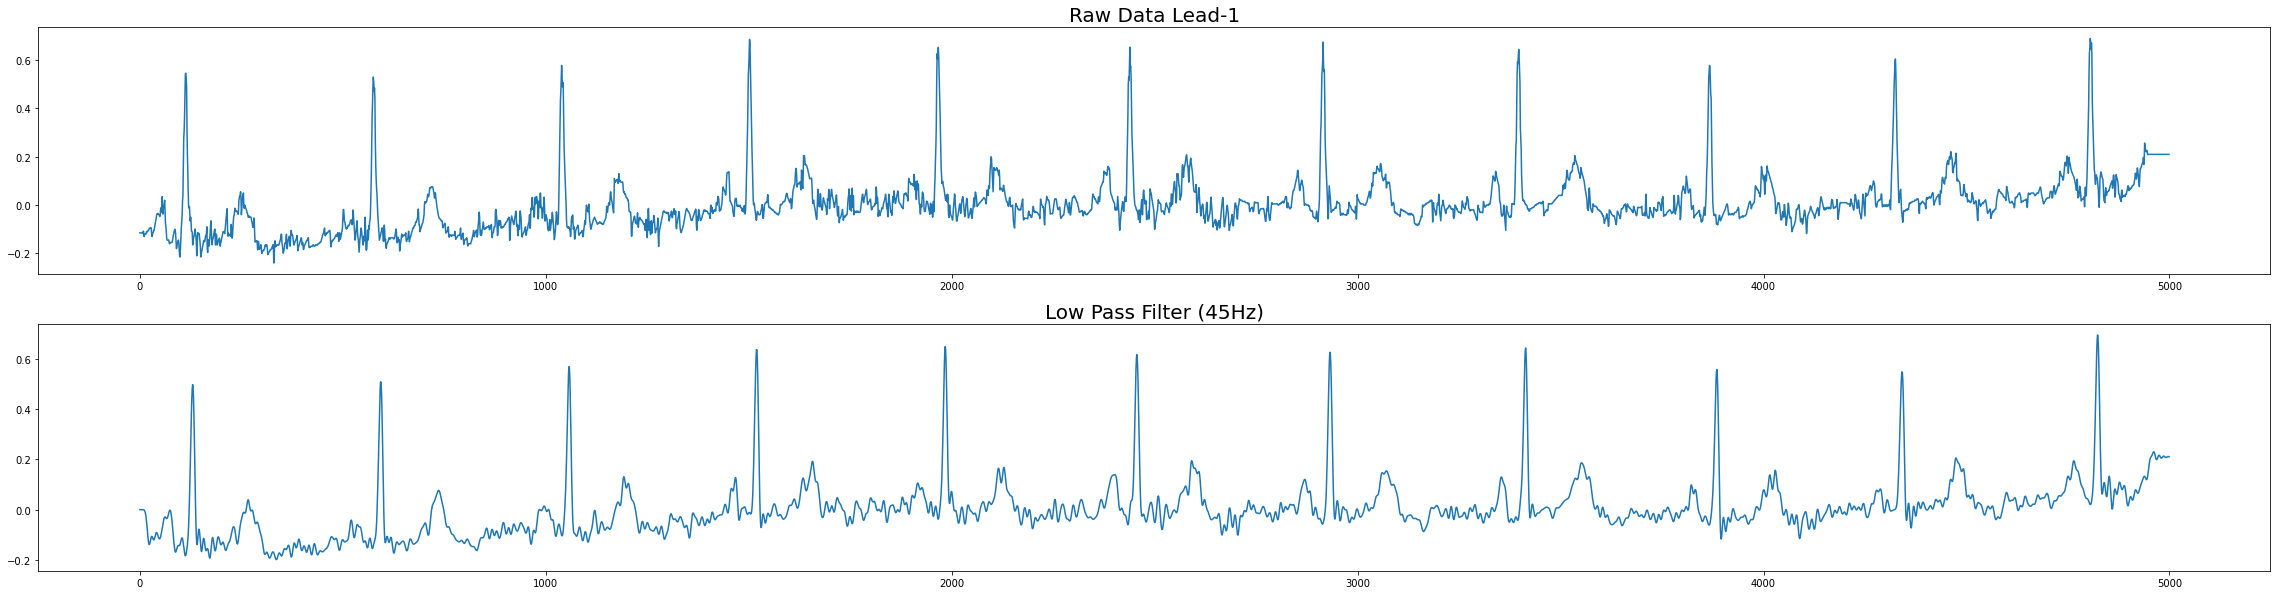

In [20]:
%matplotlib INLINE

fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title("Raw Data Lead-1", fontsize=20)
ax1.plot(lead1)

ax2 = fig.add_subplot(2,1,2)
ax2.set_title("Low Pass Filter (45Hz)", fontsize=20)
ax2.plot(filtered_ecg_data) #Low Pass Filter

plt.show()

#### Baseline Wander Remove

In [21]:
b_h, a_h = highpass_filt(500, 0.5, 5)
baseline_data = lfilter(b_h, a_h, filtered_ecg_data)

%matplotlib INLINE

fig = plt.figure(figsize=(40,10))

ax1 = fig.add_subplot(2,1,1)
ax1.set_title("BaseLine Removed Data", fontsize=20)
ax1.plot(baseline_data)

ax2 = fig.add_subplot(2,1,2)
ax2.set_title("high Pass Filter (45Hz)", fontsize=20)
ax2.plot(filtered_ecg_data)

plt.show()

#### Using Wavelet

In [47]:
import pywt
def calc_baseline(signal):
    ssds = np.zeros((3))
    cur_lp = np.copy(signal)
    iterations = 0
    
    while True:
        lp, hp = pywt.dwt(cur_lp, "db4")
        ssds = np.concatenate(([np.sum(hp**2)], ssds[:-1]))
        
        if ssds[2] > ssds[1] and ssds[1] < ssds[0]:
            break
        
        cur_lp = lp[:]
        iterations += 1 
    baseline = cur_lp[:]
    print(iterations)
    for _ in range(iterations):
        baseline = pywt.idwt(baseline, np.zeros((len(baseline))), "db4")
    
#     del ssds
#     del cur_lp
#     gc.collect()
    
    return baseline[:len(signal)]

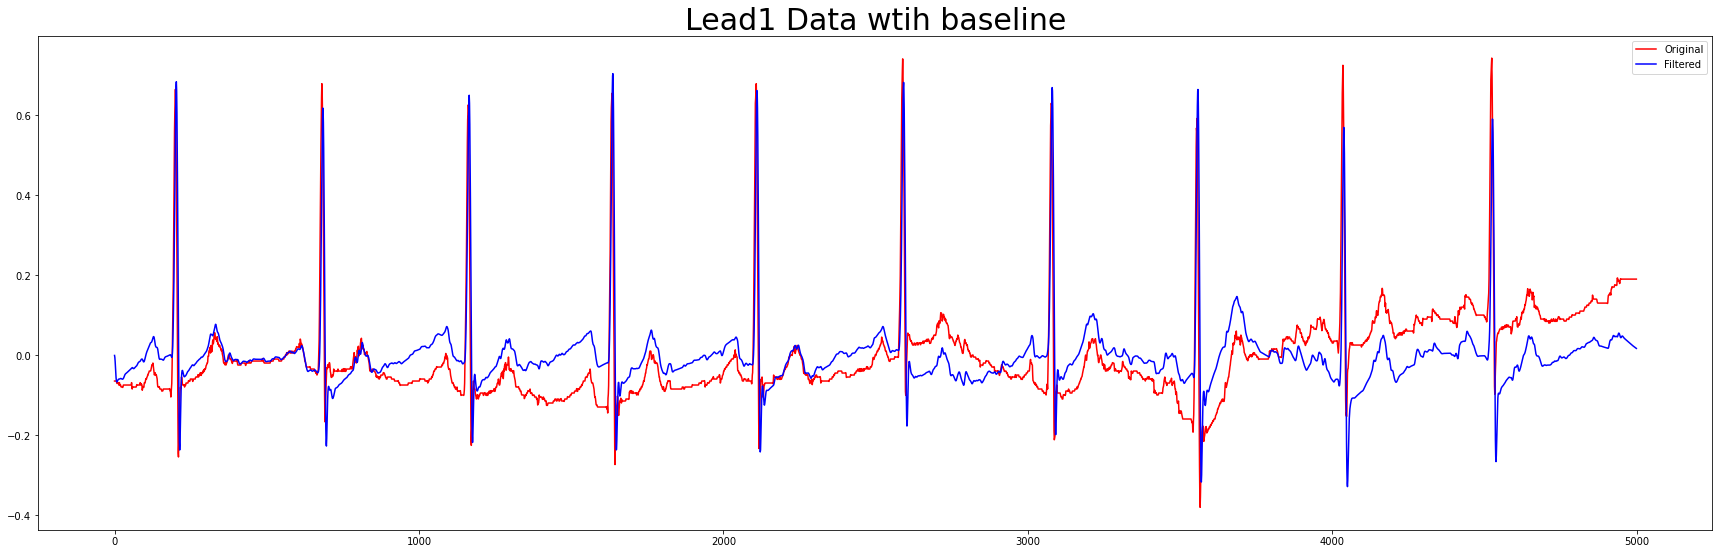

In [54]:
"""
def bandpass_filt(fs, low, high, order=5):
    nyq = 0.5 * fs
    lowcut = low / nyq 
    highcut = high / nyq
    b,a = butter(order, [lowcut, highcut], btype="band")
    return b, a
"""
%matplotlib INLINE

test_data = X_train[2197]
lead1 = test_data[:,0]
b_bp, a_bp = bandpass_filt(500, 0.5, 47, order=3)
baseline = lfilter(b_bp, a_bp, lead1)

fig = plt.figure(figsize=(30,20))

ax1 = fig.add_subplot(2,1,1)
ax1.set_title("Lead1 Data wtih baseline", fontsize=30)
ax1.plot(lead1,"r", label="Original")
ax1.plot(baseline,"b", label="Filtered")
ax1.legend()


In [48]:
test_data = X_train[2197]
lead1 = test_data[:,0]

In [ ]:
for lead in range(12):
    print("lead :",lead+1)
    baseline = calc_baseline(test_data[:,lead])

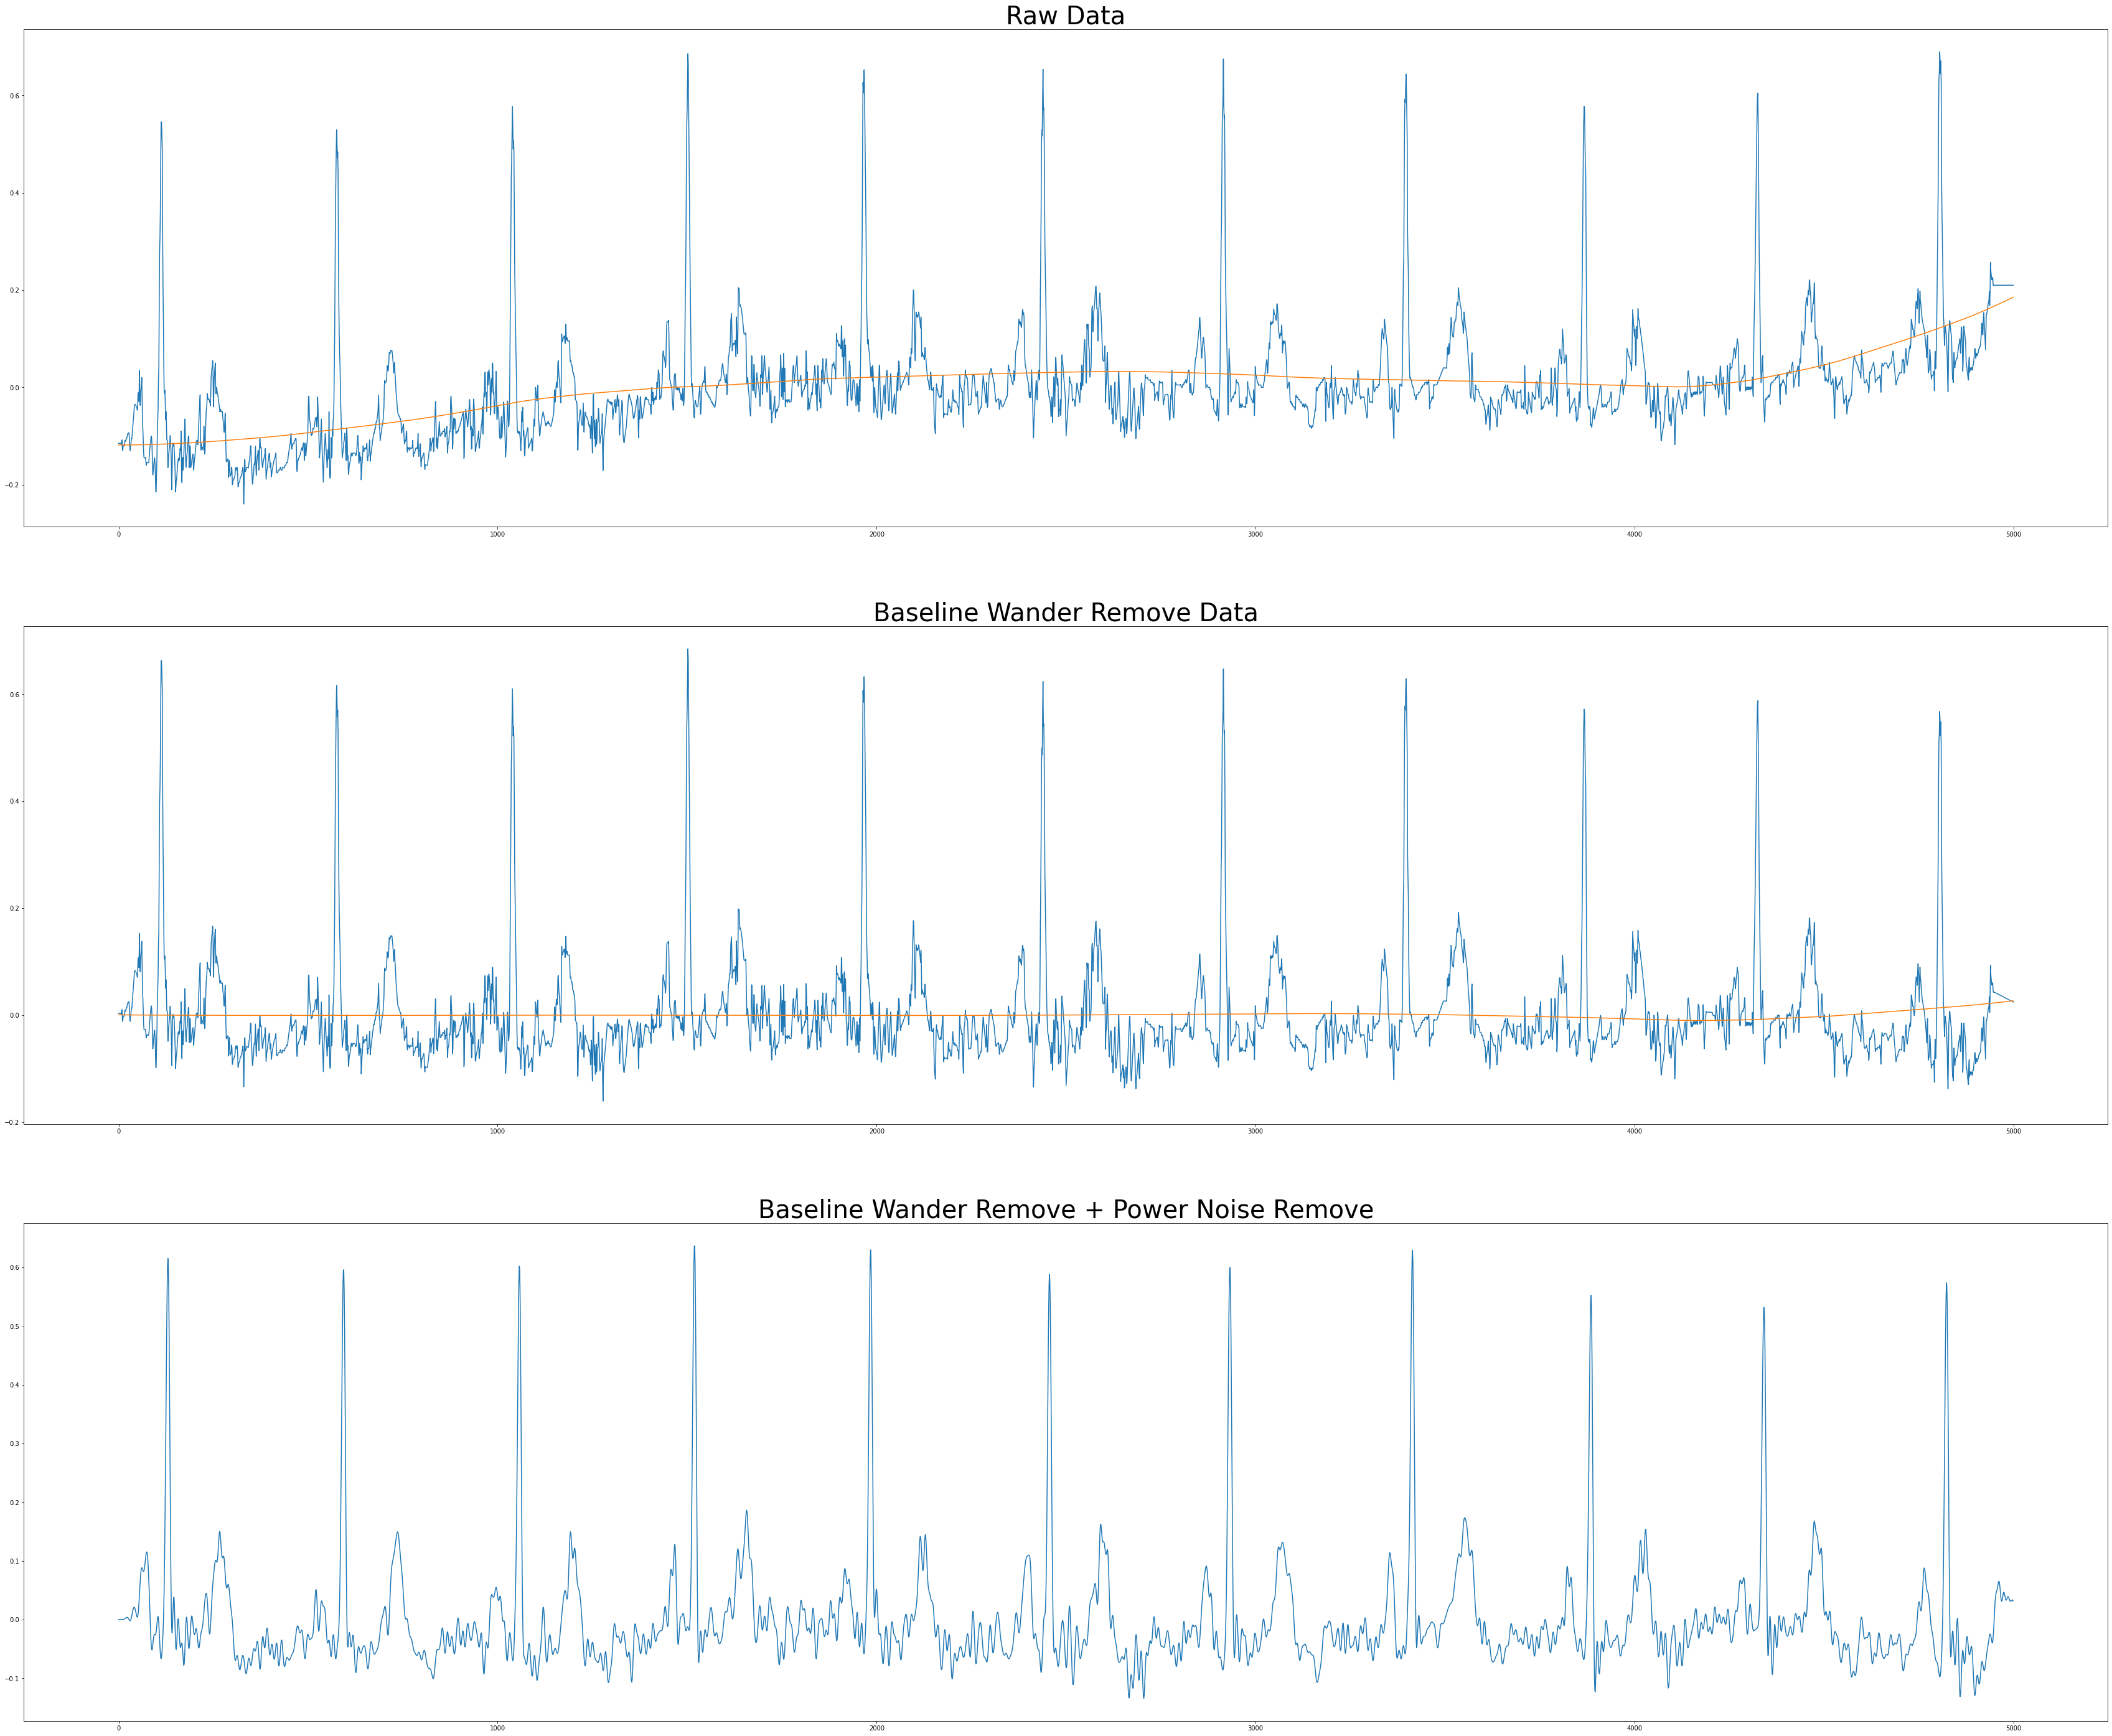

In [24]:
fig = plt.figure(figsize=(60,50))

ax1 = fig.add_subplot(3,1,1)
ax1.set_title("Raw Data", fontsize=40)
ax1.plot(lead1)
ax1.plot(baseline)

ecg_out = lead1-baseline
ecg_out_baseline = calc_baseline(ecg_out)

ax2 = fig.add_subplot(3,1,2)
ax2.set_title("Baseline Wander Remove Data", fontsize=40)
ax2.plot(ecg_out)
ax2.plot(ecg_out_baseline)

b_baseline, a_baseline = lowpass_filt(500, 45, 15) # PowerLine Noise Removal
filtered_rmb_ecg_data = lfilter(b_baseline, a_baseline, ecg_out)

ax3 = fig.add_subplot(3,1,3)
ax3.set_title("Baseline Wander Remove + Power Noise Remove", fontsize=40)
ax3.plot(filtered_rmb_ecg_data)

plt.show()

### All Dataset Filtering And Baseline Wander Remove

In [ ]:
filtered_datas = np.array([],dtype="float16")

def filtering(idx):
    data_list = np.array([],dtype="float16")
    for idx_lead in range(12):
        target = X_train[idx][:,idx_lead].astype("float16")
        # Baseline Remove
        baseline = calc_baseline(target)
        removed_Baseline = target-baseline
        # Power Filtered Data
#         b_p, a_p = lowpass_filt(500, 45, 15)
#         filtered_data = lfilter(b_p, a_p, removed_Baseline)
#         np.append(data_list, filtered_data)
#         del filtered_data
#     np.append(filtered_datas, data_list)
#     del data_list
#     gc.collect()

for idx in range(len(X_train)):
    filtering(idx)
    if idx == 2196:
        continue
    print(idx, end=", ")

일단... Baseline Wander removal는 잠시 중단하고 Powerline 필터링만하고 일단 모델링해보자

### Data Prepare with DataLoader